In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from ipywidgets import interact

In [2]:
from sklearn.metrics import classification_report

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.svm import SVC

# Support Vector Machines (SVM)

- SVM Classifiers and Regressors
- Concepts
    - Support Vectors
    - Decision Function
- Kernels
    - RBF
    - Polynomial
- SVC params: C, gamma, epsilon
- Param Grid-Search
- SVR and Regression
- Linear Regression

# Support Vector Machine

- Discriminative classifier
    - Draw a boundary/line between clusters of data
- Used for both classification and regression

# Data

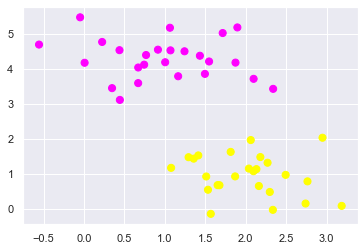

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

# Discriminative Lines

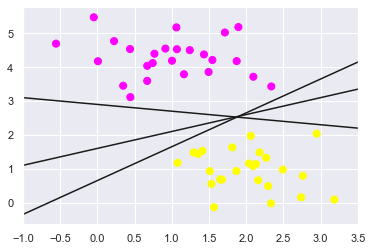

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

# Maximize the Margin: Support Vector Machines

- Draw a line
- Consider a region around that line that separates the clusters
- Try maximizing the region

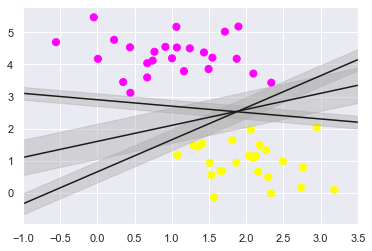

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Notice here that if we want to maximize this width, the middle fit is clearly the best.
This is the intuition of **support vector machines**, which optimize a linear discriminant model in conjunction with a **margin** representing the perpendicular distance between the datasets.

# SVC

In [8]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Decision Function and Support Vector

In [9]:
from svc_plotter import plot_svc_decision_function, plot_support

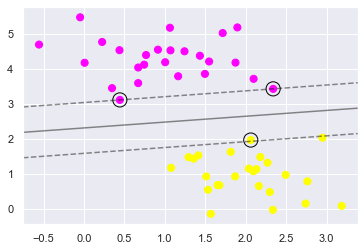

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
P = plot_svc_decision_function(X,clf)
plot_support(clf)

In [11]:
print(clf.support_vectors_)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


In [12]:
print(clf.decision_function([
        [1,0], [1,2.5], [1,5]])
     )

[ 3.41938683 -0.02456973 -3.46852629]


In [13]:
clf.n_support_

array([2, 1], dtype=int32)

In [14]:
clf.support_

array([18, 25,  7], dtype=int32)

In [15]:
X[clf.support_]

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# Summary

# End of part 1

# SVM Kernel Methods

- Radial Basis Function (rbf)
- Polynomial
- Sigmoid

# Data

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=5)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(X,clf);

# Radial Basis

- Transform the features such that represent radial information

In [ ]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azim=(-180, 180));

# Radial Basis Function (rbf)

- A more sophisticated version of the previous transform
- Makes a hyper-plane of division when none was present

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(X,clf)
plot_support(clf)

# Other kernels

- Polynomial
- Sigmoid
- Custom

In [ ]:
clf = SVC(kernel='poly', degree=2)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(X,clf)
plot_support(clf)

# Summary

# End of part 2

# SVM Parameters & Model Selection

- Params
    - C
    - gamma
    - epsilon
    - ..
- GridSearchCV

# SVM Parameters

In [5]:
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
from sklearn.svm import SVR
SVR()

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Params explained

| Param | Description | linear | rbf | poly | sigmoid |
|---|---|--------|-----|------|---------|
| `C` | Regularization Param | ✓ | ✓ | ✓ | ✓ |
| `degree` | Polynomial Degree |  |  | ✓ |  |
| `coef0` | Independent Term |  |  | ✓ | ✓ |
| `gamma` | Kernel Coefficient|  | ✓ | ✓ | ✓ |
| `epsilon` | Acceptable error margin | ✓ | ✓ | ✓ | ✓ |

### `C`
> Regularization parameter. Value inversely proporional to strength of regularization

### `degree`
> Used only for `poly` kernel. 2 → quadratic, 3 → cubic, ..

### `coef0`
> Independent Term in polynomial and sigmoid kernels

### `gamma`
> Kernel Coefficient. `"scale"`: $ \frac{1}{(nfeatures * X.var())} $, `"auto"`: $ \frac{1}{nfeatures} $

### `epsilon` (SVR-only)
> Acceptable error margin around which no penalty is levied

# Dataset: iris

In [7]:
iris = sns.load_dataset('iris')

In [8]:
X = iris.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y = iris.iloc[:, -1]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [18]:
svc = SVC(C=100)
svc

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9777777777777777

# Model Selection with Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
gs = GridSearchCV(SVC(kernel='rbf'), dict(C=[0.1, 1,10,100], 
                                          gamma=['auto', 'scale'],
                                         ))

In [22]:
gs.fit(X_train, y_train)
gs.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
est = gs.best_estimator_
est.score(X_test, y_test)

0.9777777777777777

In [24]:
gs = GridSearchCV(SVC(kernel='poly', degree=2), dict(C=[0.1, 1,10,100], 
                                           gamma=['auto', 'scale'], 
#                                            degree=[2,3], 
                                           coef0=np.arange(1,10,1),
                                                    ))
gs.fit(X_train, y_train)
svc = gs.best_estimator_
svc.score(X_test, y_test)

0.9555555555555556

In [25]:
svc

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=8,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
gs = GridSearchCV(SVC(kernel='linear'), dict(C=[0.1, 1,10,100]))
gs.fit(X_train, y_train)
svc = gs.best_estimator_
svc.score(X_test, y_test)

0.9777777777777777

In [27]:
svc

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
gs = GridSearchCV(SVC(kernel='linear'), dict(C=range(1,20)))
gs.fit(X_train, y_train)
svc = gs.best_estimator_
svc.score(X_test, y_test)

0.9777777777777777

In [29]:
svc

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



# Summary

# End of part 3

# Regression

> Predicting value of a continuous valued variable

- Classification: categorical label
- Regression: numeric label

# Dataset

In [31]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Features

In [32]:
X = pd.get_dummies(tips, drop_first=True)
X

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [33]:
y = X.pop('tip')
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [35]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)
# R-squared coef of determination
# Ratio of explained variance and total variance
# Max=1, min could be -ve

0.35430198765682874

In [36]:
svr

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Regression Performance Metrics

### Sum of Squares Error (SSE)
> $ SSE = \sum{(Predicted - Actual)^2} $

### Mean Square Error (MSE)
> $ MSE = \frac{SSE}{NumPoints} $

### Root Mean Square Error (RMSE)
> $ RMSE = \sqrt{MSE} $

### Coefficient of Determination ($R^2$)

> $ R^2 = 1 - \frac{SSE}{SST} $

### Total Sum of Squares Error (SST)
> $ SST = \sum{(Actual - MeanActual)^2} $

In [37]:
gs = GridSearchCV(SVR(kernel='rbf'), dict(C=[0.1,1,10,100], 
                                          gamma=['scale','auto'], 
                                          epsilon=np.arange(0,5,0.5)))
gs.fit(X_train, y_train)
est = gs.best_estimator_
est.score(X_test, y_test)

0.4584619688158123

In [38]:
est

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.0, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
gs = GridSearchCV(SVR(kernel='poly', degree=2), dict(C=[0.1,1,10,100], 
#                                            degree=[2,3], 
                                           coef0=np.arange(0,10,1), 
                                           epsilon=np.arange(0,5,0.5)))
gs.fit(X_train, y_train)
est = gs.best_estimator_
est.score(X_test, y_test)

0.42060384723853556

In [40]:
est

SVR(C=1, cache_size=200, coef0=9, degree=2, epsilon=0.5, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
gs = GridSearchCV(SVR(kernel='linear'), dict(C=[0.1,1,10,100],
                                             epsilon=np.arange(0,5,0.5)))
gs.fit(X_train, y_train)
est = gs.best_estimator_
est.score(X_test, y_test)

0.5106136242784295

In [42]:
est

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
gs = GridSearchCV(SVR(kernel='linear'), dict(C=np.arange(0.05,0.5,0.05),
                                             epsilon=np.arange(0,1,0.1)))
gs.fit(X_train, y_train)
est = gs.best_estimator_
est.score(X_test, y_test)

0.5181822170203547

In [44]:
est

SVR(C=0.05, cache_size=200, coef0=0.0, degree=3, epsilon=0.8, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression(normalize=True)

In [47]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5122133123426886

# Summary

# End of module